# 1. Import and Install Dependencies

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction using mediapipe model
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [93]:
cap = cv2.VideoCapture(0)
# Set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [94]:
draw_styled_landmarks(frame, results)

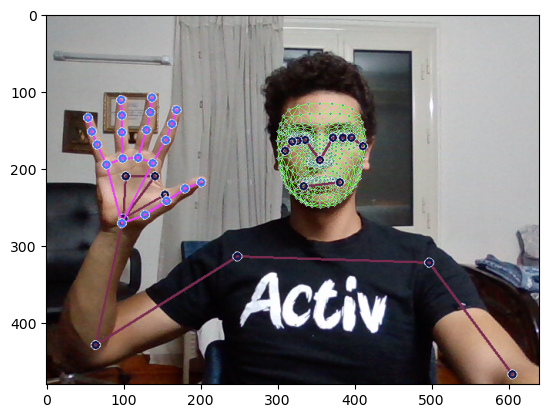

In [95]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
# extracts the pose landmarks and stores them in a list called pose. Each landmark is represented by its x, y, and z coordinates
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
extract_keypoints(results).shape

(1662,)

# 4. Setup Folders for Collection

In [72]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('huge_Data') 

# Actions that we try to detect
actions = np.array(['computers','information','student','mansoura','iloveyou','in','screen'])

# Thirty videos worth of data
no_sequences = 100

# Videos are going to be 30 frames in length
sequence_length = 30

In [73]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love y

In [15]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing 

In [17]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                 #print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [74]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [75]:
label_map = {label:num for num, label in enumerate(actions)}

In [76]:
label_map

{'computers': 0,
 'information': 1,
 'student': 2,
 'mansoura': 3,
 'iloveyou': 4,
 'in': 5,
 'screen': 6}

In [77]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [78]:
np.array(sequences).shape

(700, 30, 1662)

In [79]:
np.array(labels).shape

(700,)

In [80]:
X = np.array(sequences)

In [81]:
X.shape

(700, 30, 1662)

In [82]:
y = to_categorical(labels).astype(int)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [84]:
y_test.shape

(35, 7)

In [85]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

# 7. Build and Train Neural Network

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import TensorBoard

In [56]:
log_dir = os.path.join('Logss')
tb_callback = TensorBoard(log_dir=log_dir)

## testing with different models (LSTM, GRU, Transformers)

In [ ]:
# LSTM Model
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
# GRU Model
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(GRU(128, return_sequences=True, activation='relu'))
model.add(GRU(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
!pip install tensorflow-addons

In [86]:
# Tansformer Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LayerNormalization, Dropout
from tensorflow_addons.layers import MultiHeadAttention
import tensorflow_addons as tfa

# Define actions
actions = ['computers','information','student','mansoura','iloveyou','in','screen']
# Define a custom Transformer Encoder layer
class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.mha = MultiHeadAttention(head_size=embed_dim, num_heads=num_heads)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, x, training):
        attn_output = self.mha([x, x, x])
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Model configuration
embed_dim = 64  # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 128  # Hidden layer size in feed forward network inside transformer

# Build the model
input_shape = (30, 1662)
inputs = Input(shape=input_shape)
x = inputs
x = Dense(embed_dim)(x)  # First, transform input to embedding size

# Add multiple Transformer Encoder layers
for _ in range(2):
    x = TransformerEncoder(embed_dim, num_heads, ff_dim)(x)

# Global average pooling
x = tf.keras.layers.GlobalAveragePooling1D()(x)

# Fully connected layers
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(len(actions), activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Print the model summary
model.summary()


Model: "model_2"


C:\Users\Mark Adly\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 1662)]        0         
                                                                 
 dense_16 (Dense)            (None, 30, 64)            106432    
                                                                 
 transformer_encoder_4 (Tra  (None, 30, 64)            82432     
 nsformerEncoder)                                                
                                                                 
 transformer_encoder_5 (Tra  (None, 30, 64)            82432     
 nsformerEncoder)                                                
                                                                 
 global_average_pooling1d_2  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_21 

In [87]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
21/21 [==============================] - 4s 42ms/step - loss: 1.9506 - categorical_accuracy: 0.1519
Epoch 2/1000
21/21 [==============================] - 1s 41ms/step - loss: 1.7335 - categorical_accuracy: 0.3143
Epoch 3/1000
21/21 [==============================] - 1s 42ms/step - loss: 1.2171 - categorical_accuracy: 0.5669
Epoch 4/1000
21/21 [==============================] - 1s 41ms/step - loss: 0.7158 - categorical_accuracy: 0.7218
Epoch 5/1000
21/21 [==============================] - 1s 42ms/step - loss: 0.3278 - categorical_accuracy: 0.9203
Epoch 6/1000
21/21 [==============================] - 1s 42ms/step - loss: 0.1340 - categorical_accuracy: 0.9774
Epoch 7/1000
21/21 [==============================] - 1s 39ms/step - loss: 0.1825 - categorical_accuracy: 0.9263
Epoch 8/1000
21/21 [==============================] - 1s 40ms/step - loss: 0.0412 - categorical_accuracy: 0.9970
Epoch 9/1000
21/21 [==============================] - 1s 53ms/step - loss: 0.0411 - categorical_

KeyboardInterrupt: 

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping])

Epoch 1/100
21/21 [==============================] - 1s 58ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0016 - val_categorical_accuracy: 1.0000
Epoch 2/100
21/21 [==============================] - 1s 36ms/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.0013 - val_categorical_accuracy: 1.0000
Epoch 3/100
21/21 [==============================] - 1s 34ms/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.0014 - val_categorical_accuracy: 1.0000
Epoch 4/100
21/21 [==============================] - 1s 35ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0011 - val_categorical_accuracy: 1.0000
Epoch 5/100
21/21 [==============================] - 1s 35ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0011 - val_categorical_accuracy: 1.0000
Epoch 6/100
13/21 [=================>............] - ETA: 0s - loss: 0.0012 - categorical_accuracy: 1.0000

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # Plot accuracy
    axs[0].plot(history.history['categorical_accuracy'], label='train accuracy')
    axs[0].plot(history.history['val_categorical_accuracy'], label='val accuracy')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(loc='upper left')

    # Plot loss
    axs[1].plot(history.history['loss'], label='train loss')
    axs[1].plot(history.history['val_loss'], label='val loss')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(loc='upper left')

    plt.show()

plot_training_history(history)


In [59]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30, 1662)]        0         
                                                                 
 dense_8 (Dense)             (None, 30, 64)            106432    
                                                                 
 transformer_encoder_2 (Tra  (None, 30, 64)            82432     
 nsformerEncoder)                                                
                                                                 
 transformer_encoder_3 (Tra  (None, 30, 64)            82432     
 nsformerEncoder)                                                
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                           

# 8. Make Predictions

In [88]:
res = model.predict(X_test)

2/2 [==============================] - 0s 21ms/step


In [89]:
actions[np.argmax(res[0])]

'screen'

In [90]:
actions[np.argmax(y_test[0])]

'screen'

# 9. Save Weights

In [92]:
model.save('7good_words.h5')

C:\Users\Mark Adly\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 10. Evaluation using Confusion Matrix and Accuracy

In [63]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [64]:
yhat = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [65]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [66]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[29,  0],
        [ 0,  6]],

       [[29,  0],
        [ 0,  6]],

       [[34,  0],
        [ 0,  1]],

       [[31,  0],
        [ 0,  4]],

       [[30,  0],
        [ 0,  5]],

       [[30,  0],
        [ 0,  5]],

       [[27,  0],
        [ 0,  8]]], dtype=int64)

In [67]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [68]:
from scipy import stats

In [ ]:
actions = ['Hello','there','I am','student','in','faculty','computers','and','information','university','Mansoura']
colors = [
    (245, 117, 16), (117, 245, 16), (16, 117, 245), (245, 16, 117),
    (117, 16, 245), (16, 245, 117), (245, 245, 16), (16, 245, 245),
    (245, 16, 16), (16, 16, 245), (117, 117, 117),(12,12,12),
    (20,20,20),(50,60,120),(25,120,66),(45,66,99),
    (125,198,220),(123,65,244),(210,240,230),(33,55,99)
]
['computers','enemy','I am','iloveyou','information','job','screen',
                   'student','family']

In [69]:

colors = [
    (245, 117, 16), (117, 245, 16), (16, 117, 245), (245, 16, 117),
    (117, 16, 245), (16, 245, 117), (245, 245, 16)
]



In [70]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [91]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.85

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 12. Converge Model into Tensorflowlite

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Input, LayerNormalization, Dropout, GlobalAveragePooling1D, MultiHeadAttention


In [ ]:


# Ensure custom objects are defined if your model includes custom layers
class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, x, training=False):
        attn_output = self.mha(x, x)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [ ]:
# Load the pre-trained model
model = load_model('20_words.h5', custom_objects={"TransformerEncoder": TransformerEncoder})



In [ ]:
import tensorflow
from tensorflow.keras.models import save_model

In [ ]:
tensorflow.keras.models.save_model(model, 'pbtxt')
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model=model)
model_tflite = converter.convert()

open("test_3_words.tflite", "wb").write(model_tflite)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import save_model, load_model
import tensorflow_addons as tfa

# Save the model
save_model(model, 'pbtxt')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model=model)
model_tflite = converter.convert()

with open("test_3_words.tflite", "wb") as f:
    f.write(model_tflite)

# Load the model with custom objects (if needed later)
custom_objects = {"MultiHeadAttention": tfa.layers.MultiHeadAttention}
loaded_model = load_model('pbtxt', custom_objects=custom_objects)
